In [ ]:
# set root directory path
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get("PROJECT_SRC")
os.chdir(src_path)

src_path

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import pandas as pd
import loads
from data_reader_writer import data_writer
import marginal_costs


# 2030 Demand Using FES
The following are based on the data from the 2022 FES and from the ESPENI dataset to generate some demand curves that will show the demand for electricity in 2030. This demand can be split and shown for each of the main buses in the UK as and is shown for the full 2030 year as well as for one singular data in the year.

In [24]:
# start and end of simulation
start = "2030-01-01 00:00:00"
end = "2030-12-31 23:30:00"

# time step as fraction of hour
time_step = 1

year_baseline = 2020
FES_year = 2022
FES_scenario = "Leading The Way"

In [25]:
year = int(start[0:4])

loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, "historical", year_baseline=year_baseline, scenario=FES_scenario, FES=FES_year)

df_loads = pd.read_csv("LOPF_data/loads-p_set.csv", index_col=0)

C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\loads.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dti = pd.date_range(
C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\loads.py:172: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dti = pd.date_range(
C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\loads.py:289: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  scaled_load = scaled_load.resample(freq).mean()


Text(0, 0.5, 'Load [MW]')

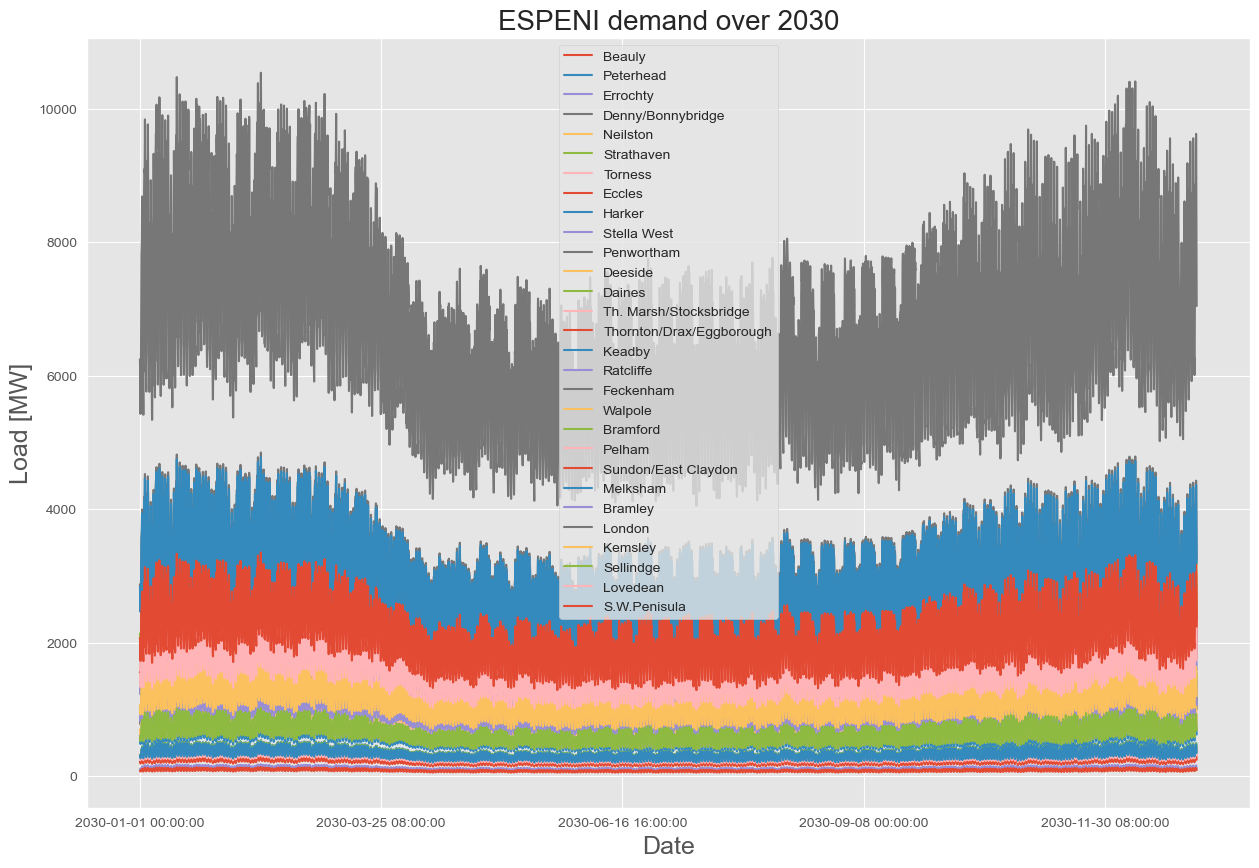

In [26]:
# plot demand for the year sorting by bus
df_loads.plot(linestyle='-', figsize=(15,10))
plt.title(f"ESPENI demand over {year}", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Load [MW]", fontsize=18)

Text(0, 0.5, 'Load [MW]')

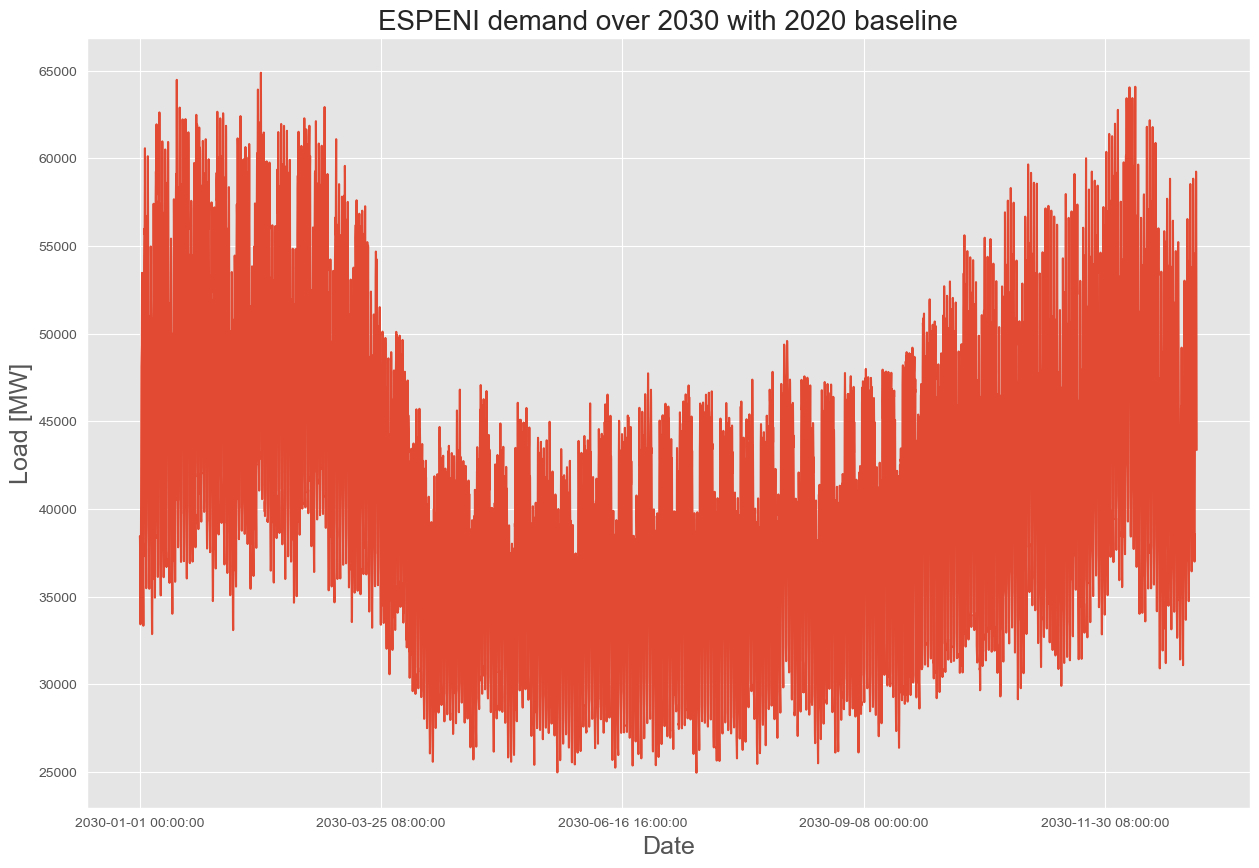

In [27]:
# plot demand for the year
df_loads["Total"] = df_loads.sum(axis=1)
df_loads["Total"].plot(linestyle='-', figsize=(15,10))
plt.title(f"ESPENI demand over {year} with {year_baseline} baseline", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Load [MW]", fontsize=18)

# 2030 Generation 

In [28]:
start = str(year) + "-12-02 00:00:00"
end = str(year) + "-12-02 03:30:00"
# time step as fraction of hour
time_step = 0.5
if year > 2020:
    data_writer(start, end, time_step, year, demand_dataset="eload", year_baseline=2012, scenario=FES_scenario, FES=FES_year) # why is year baseline 2012
if year <= 2020:
    data_writer(start, end, time_step, year, demand_dataset="historical")

df_generators = pd.read_csv("LOPF_data/generators.csv", index_col=0)

C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\snapshots.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dti = pd.date_range(
C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\loads.py:77: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dti = pd.date_range(
C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\loads.py:82: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_eload = df_eload.resample('0.5H').interpolate('polynomial', order=2)
C:\OneDrives\OneDrive - University of Edinburgh\University Courses\5. Fifth Year\MEng Project\PyPSA-GB_2030\PyPSA-GB\loads.py:88: FutureWarning: 'H' is deprecated and will be removed in a futu

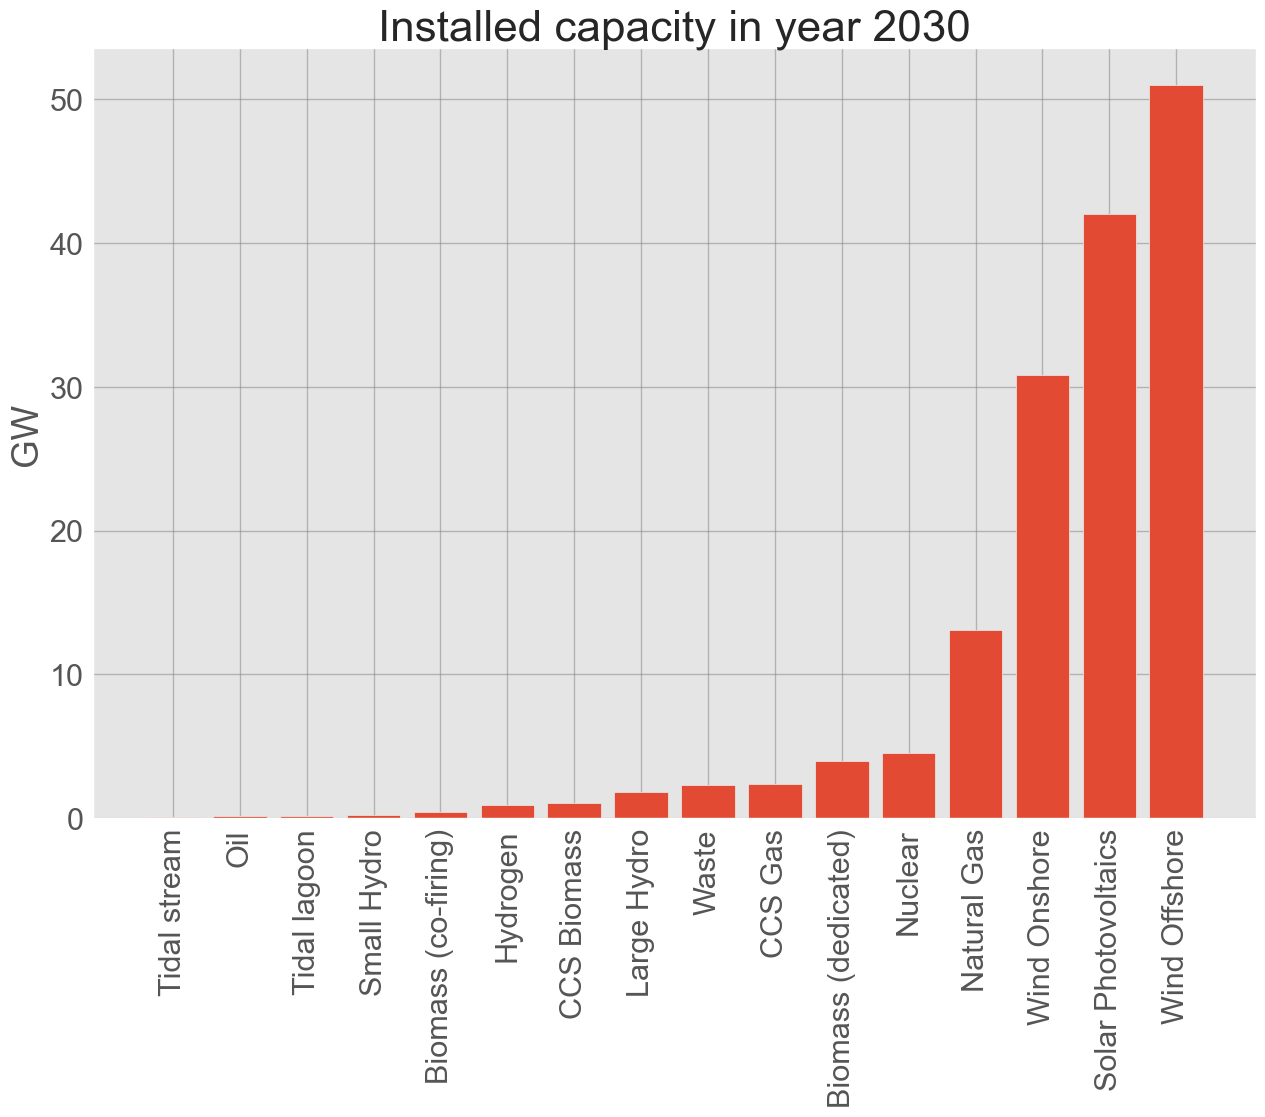

In [29]:
generators_p_nom = df_generators.p_nom.groupby(df_generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop("Unmet Load", inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({"font.size": 22})
# bar chart
plt.figure(figsize=(15,10))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel("GW")
plt.grid(color="grey", linewidth=1, axis="both", alpha=0.5)
plt.title("Installed capacity in year " + str(year))
plt.show()